## Clusterization

## K-means

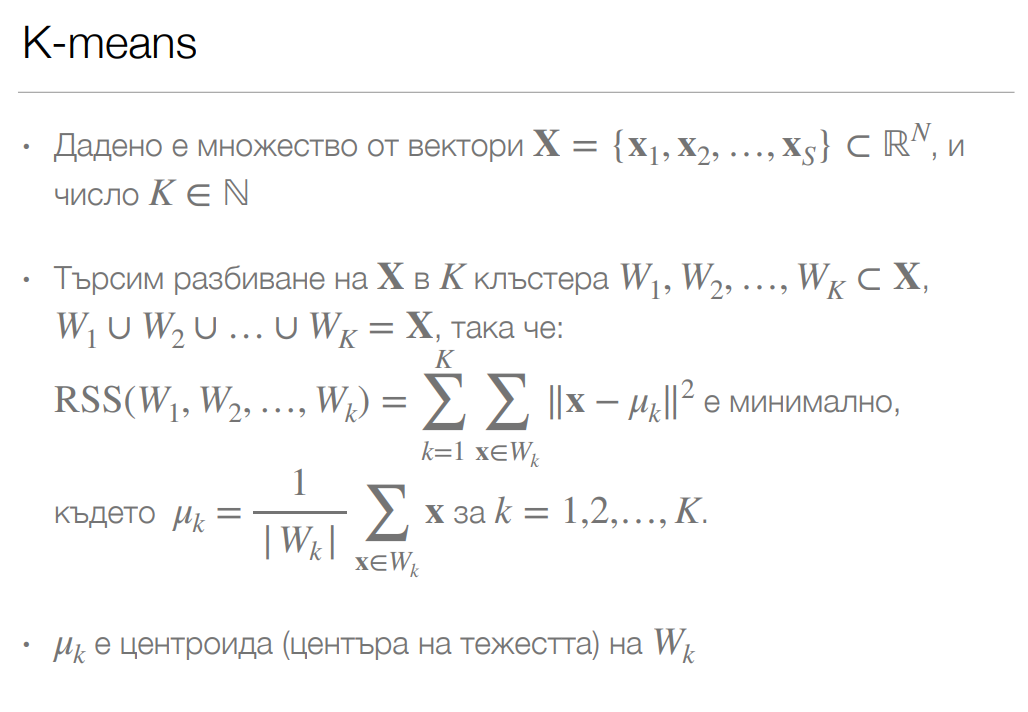

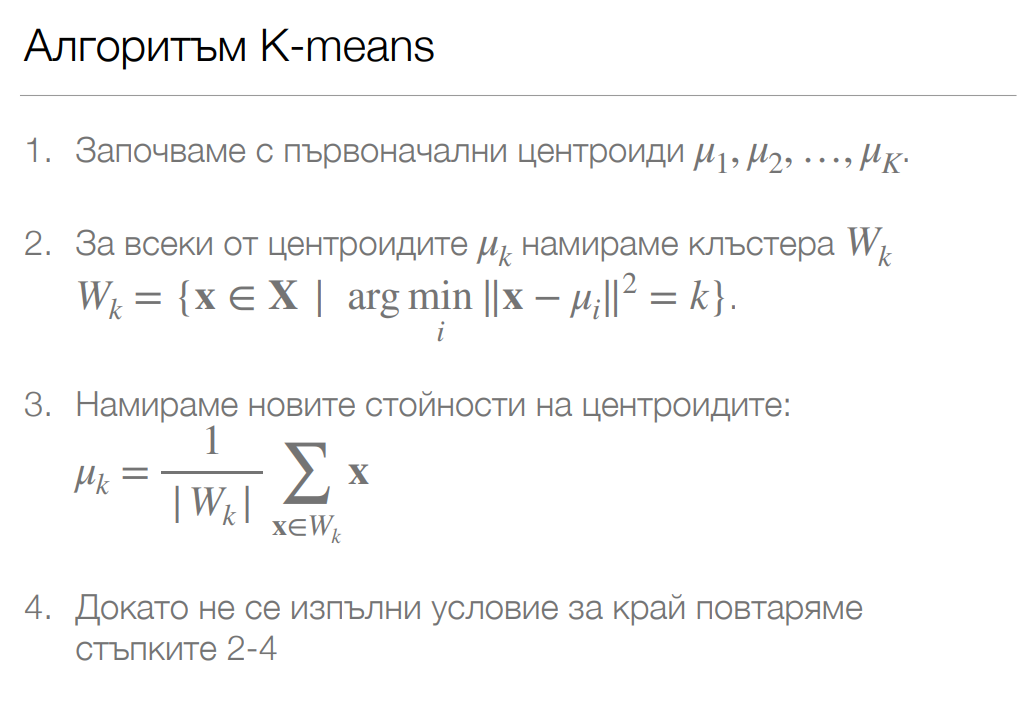

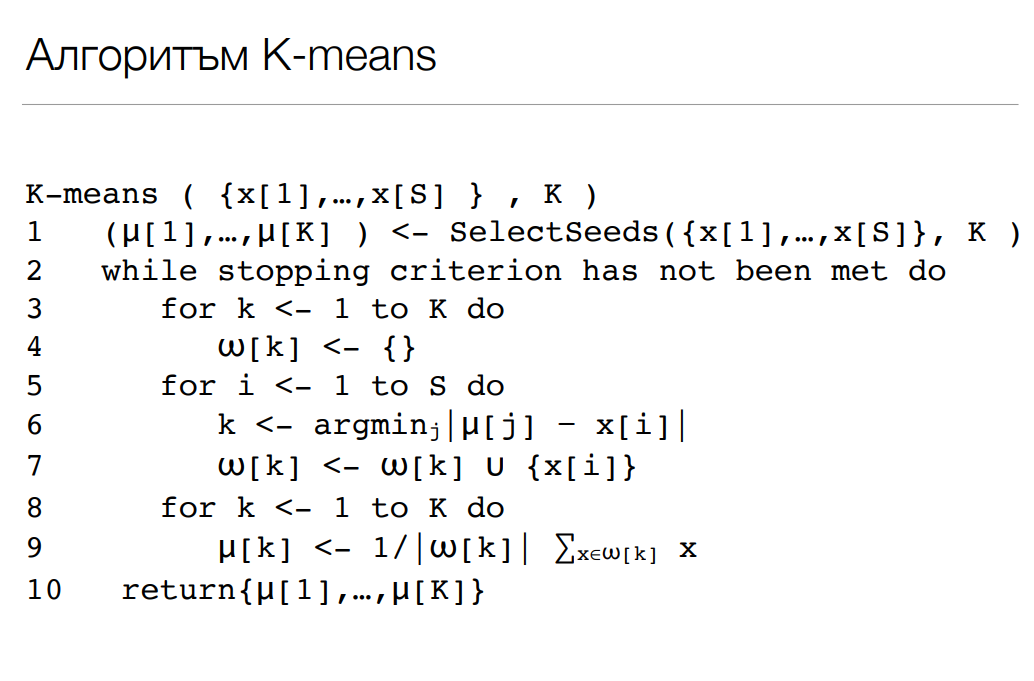

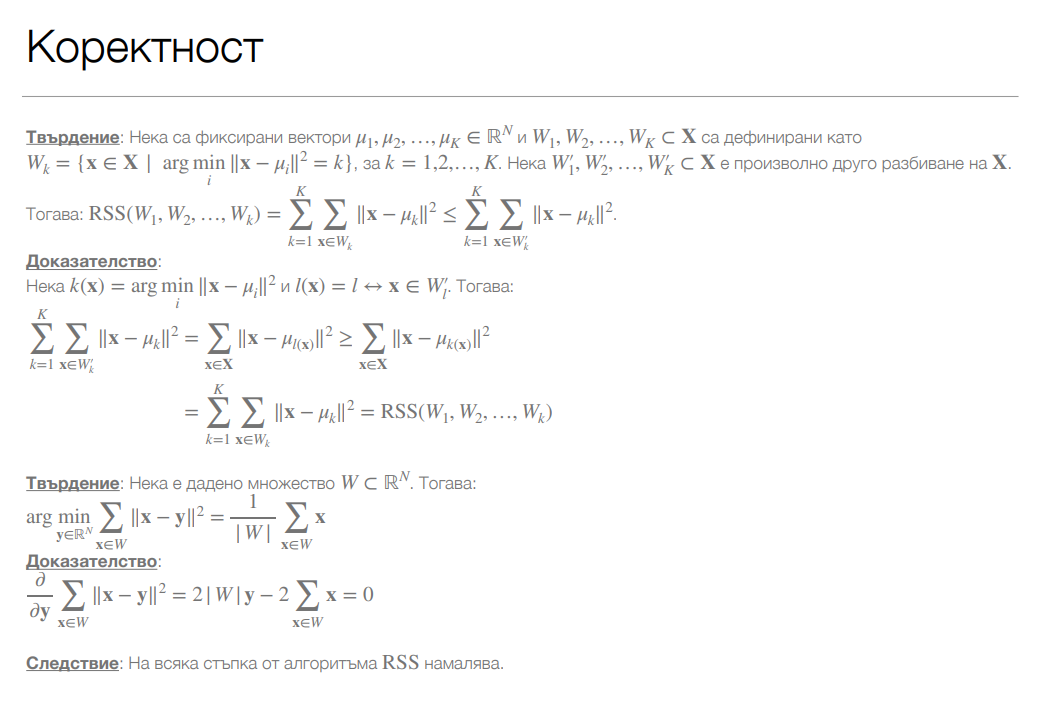

| Training  | Final centroids |
| ------------- | ------------- |
| 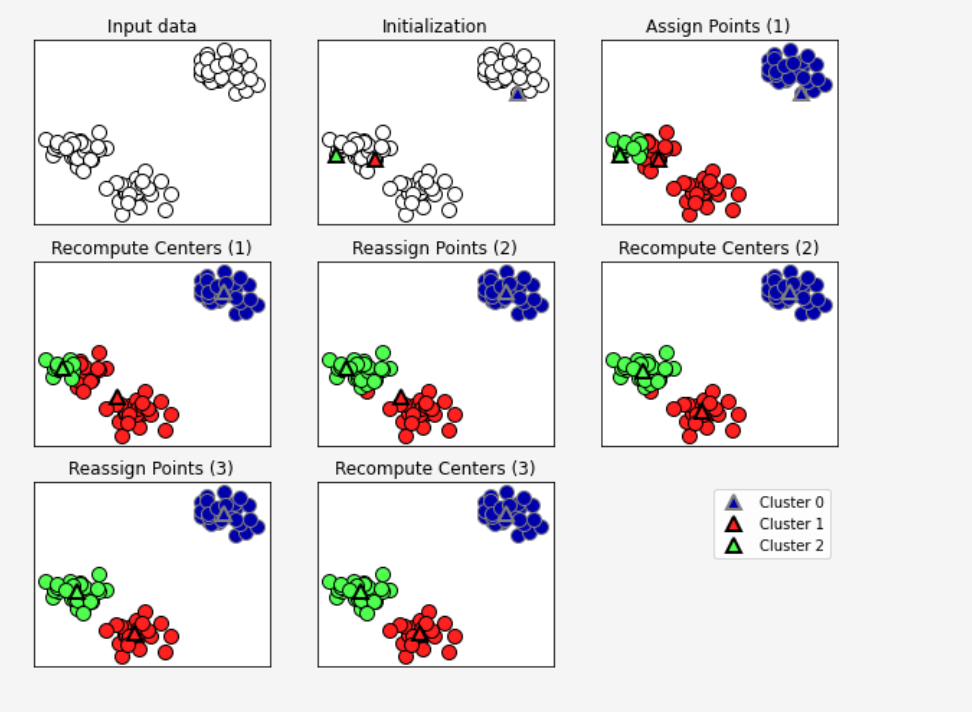   | 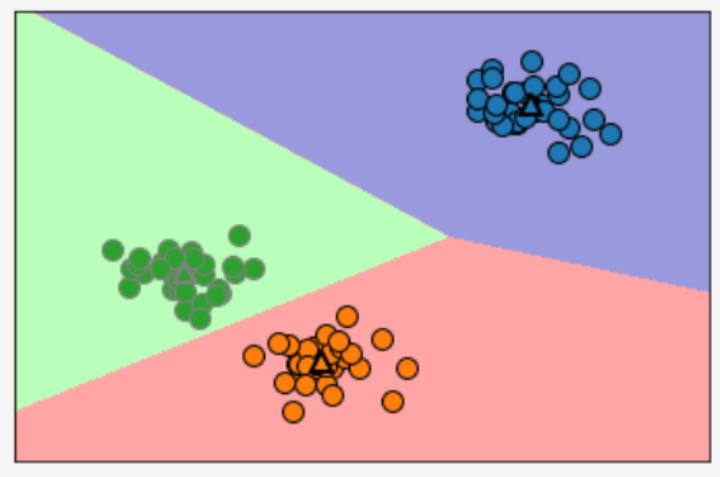  |



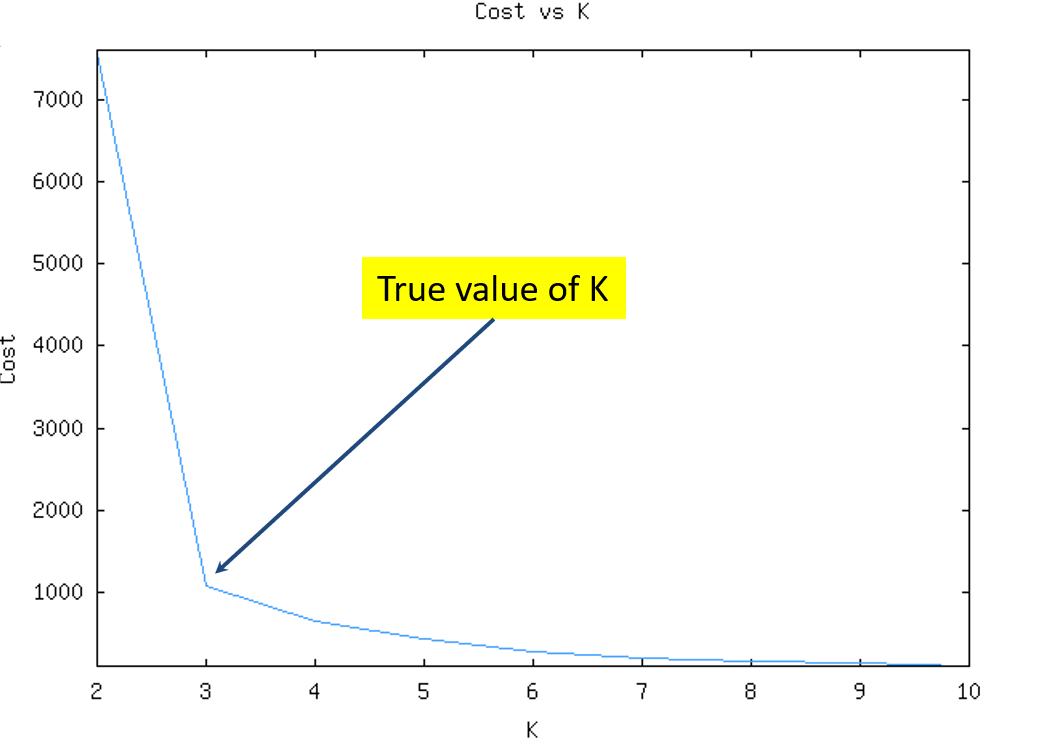

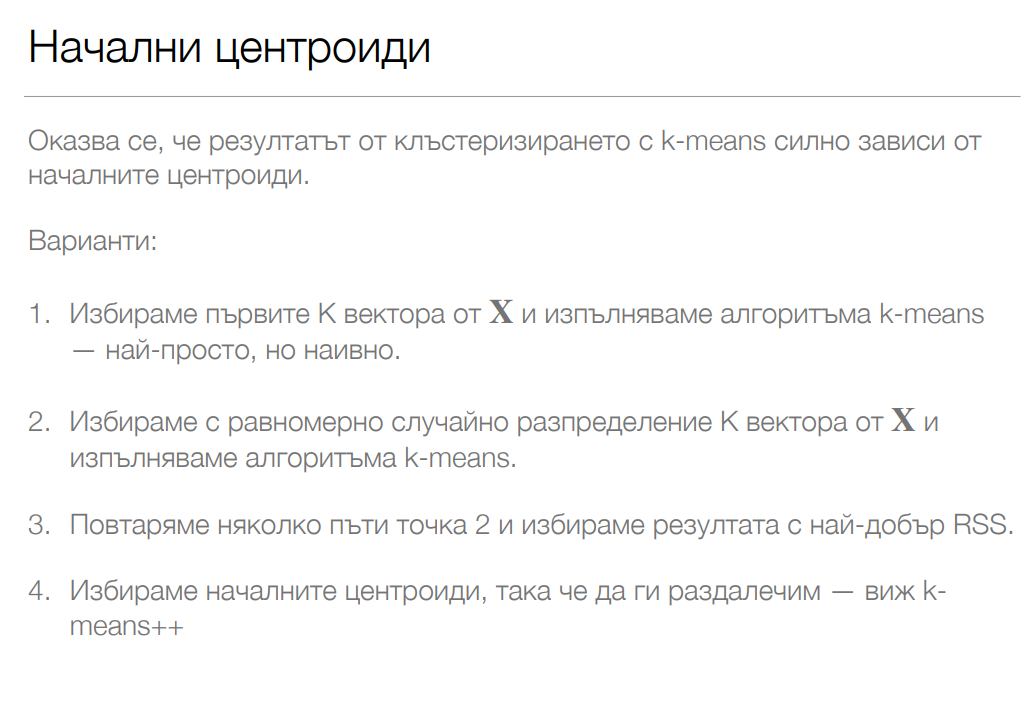

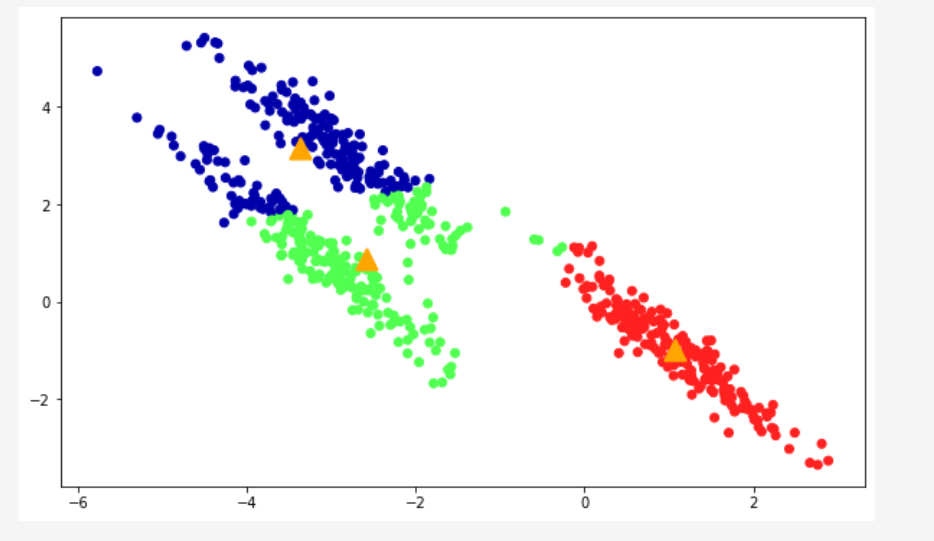

## K-means++

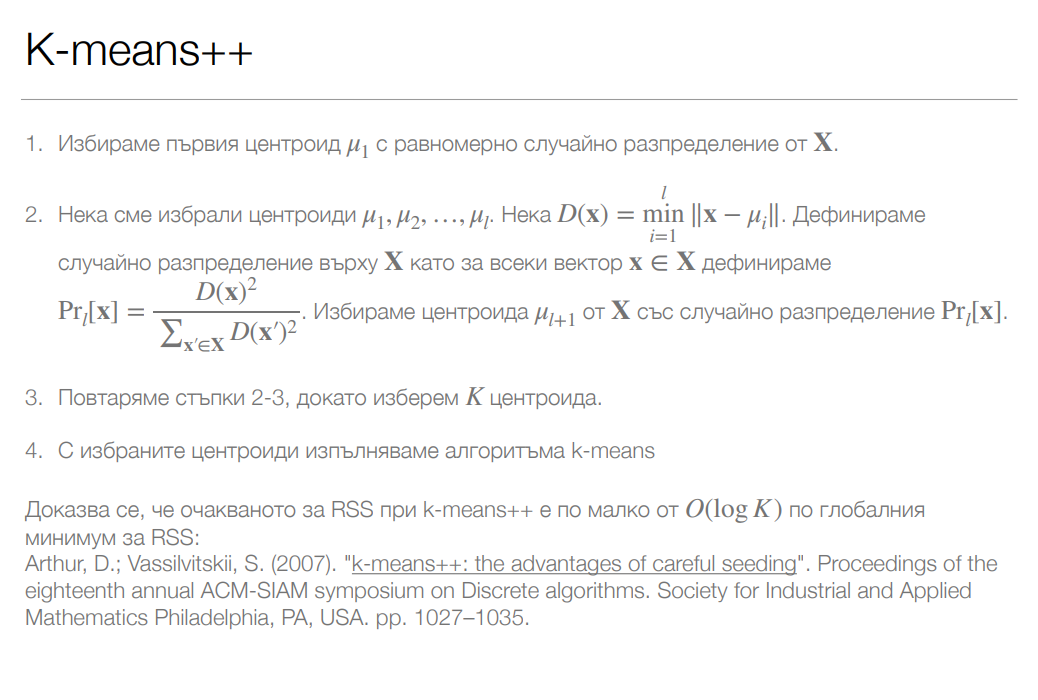

## Soft K-means

Soft assigns a point to clusters (so it give a probability of any point belonging to any centroid).
It doesn't depend on the L2 norm, but is based on the Expectation, i.e., the probability of the point belonging to a particular cluster. This makes K-means biased towards spherical clusters.

[Soft K-means](https://www.youtube.com/watch?v=fpM0iZTjLhM)

# K Means Color Quantization

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [2]:
image_as_array = mpimg.imread('Data/fmi.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [250, 255, 255],
        [251, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [251, 255, 255],
        [251, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 255, 255],
        [251, 255, 255],
        [251, 255, 255]],

       ...,

       [[ 71, 101,  11],
        [ 54,  83,   0],
        [ 91, 119,  32],
        ...,
        [ 22,  69,   0],
        [ 24,  71,   1],
        [ 28,  75,   5]],

       [[ 82, 115,  26],
        [ 91, 124,  35],
        [ 75, 105,  17],
        ...,
        [ 16,  63,   0],
        [ 20,  67,   0],
        [ 29,  76,   6]],

       [[ 94, 128,  41],
        [ 85, 119,  32],
        [ 95, 128,  41],
        ...,
        [ 23,  70,   0],
        [ 24,  71,   1],
        [ 29,  76,   6]]

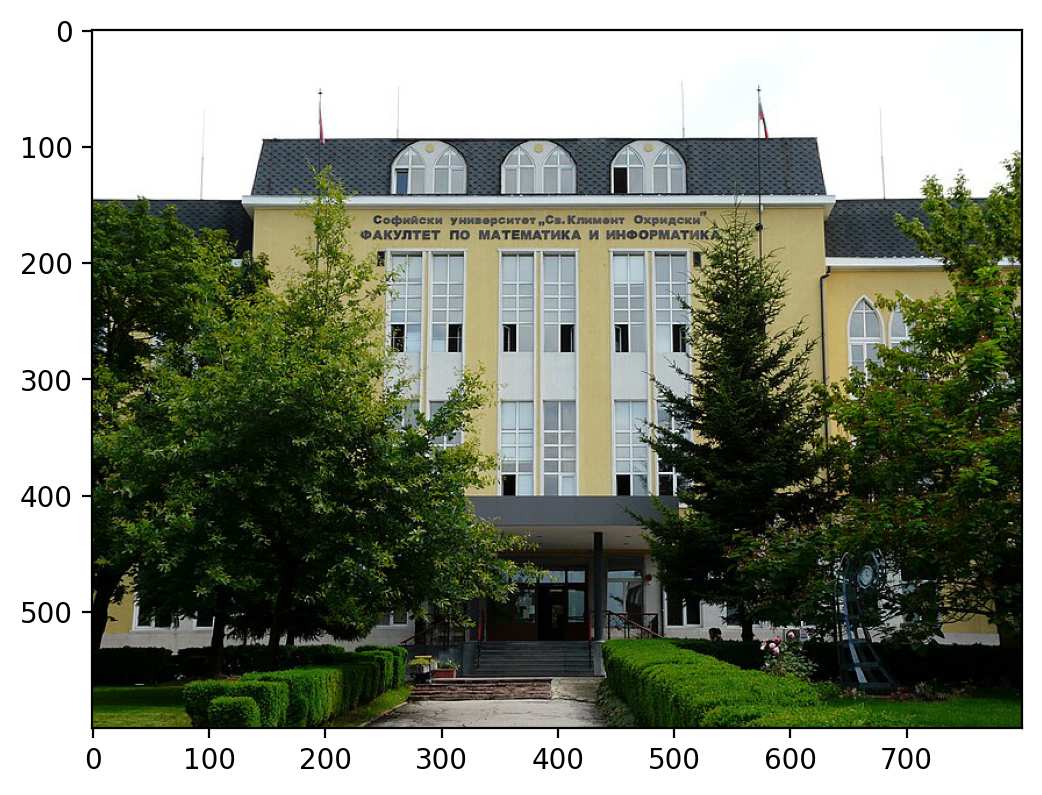

In [4]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [5]:
image_as_array.shape
# (h,w,3 color channels)

(600, 800, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [8]:
from sklearn.cluster import KMeans

In [9]:
# try x for x in [4, 32] clusters
model = KMeans(n_clusters=32)

In [10]:
model

KMeans(n_clusters=32)

In [11]:
labels = model.fit_predict(image_as_array2d)

c:\Users\MSI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
labels

array([ 4,  4,  4, ..., 19, 19, 19])

In [ ]:
# THESE ARE THE x RGB COLOR CODES!
model.cluster_centers_

array([[ 75.61063479,  85.32860676,  92.21970322],
       [194.20302978, 202.95194149, 204.3757618 ],
       [  7.75772877,  16.77819856,   3.58629737],
       [173.63848397, 165.05512854, 112.89575051],
       [254.10401374, 254.76991812, 254.73020459],
       [ 58.59756205,  85.94159432,   8.31640796],
       [ 98.58311384, 104.11047703, 101.26704712],
       [ 28.22096473,  45.82375563,   5.33754532],
       [162.24831705, 171.61368078, 173.16254072],
       [ 76.83939315, 107.03518179,  13.15053623],
       [ 44.91562189,  51.01472637,  50.04845771],
       [ 64.79208903,  75.95096959,  39.64709123],
       [177.16513276, 187.70295144, 189.92690151],
       [133.05685106, 135.86706383,  69.80306383],
       [132.65709729, 138.44936204, 136.51807549],
       [106.96562552, 112.6947612 ,  65.43199471],
       [196.44858382, 193.8012248 , 154.22276091],
       [ 47.81750532,  60.49326719,  23.5394224 ],
       [  1.87841681,   5.90325798,   1.3506021 ],
       [ 38.15450399,  67.30004

In [ ]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [ ]:
rgb_codes

array([[ 76,  85,  92],
       [194, 203, 204],
       [  8,  17,   4],
       [174, 165, 113],
       [254, 255, 255],
       [ 59,  86,   8],
       [ 99, 104, 101],
       [ 28,  46,   5],
       [162, 172, 173],
       [ 77, 107,  13],
       [ 45,  51,  50],
       [ 65,  76,  40],
       [177, 188, 190],
       [133, 136,  70],
       [133, 138, 137],
       [107, 113,  65],
       [196, 194, 154],
       [ 48,  60,  24],
       [  2,   6,   1],
       [ 38,  67,   4],
       [ 19,  25,  18],
       [ 32,  39,  29],
       [ 85,  87,  67],
       [ 60,  68,  71],
       [ 15,  31,   3],
       [148, 157, 158],
       [157, 151,  95],
       [188, 177, 125],
       [213, 222, 223],
       [120, 124, 113],
       [ 85,  99,  39],
       [106, 126,  33]])

In [ ]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [ ]:
quantized_image

array([[[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       ...,

       [[ 77, 107,  13],
        [ 59,  86,   8],
        [106, 126,  33],
        ...,
        [ 38,  67,   4],
        [ 38,  67,   4],
        [ 38,  67,   4]],

       [[ 77, 107,  13],
        [106, 126,  33],
        [ 77, 107,  13],
        ...,
        [ 28,  46,   5],
        [ 38,  67,   4],
        [ 38,  67,   4]],

       [[106, 126,  33],
        [ 85,  99,  39],
        [106, 126,  33],
        ...,
        [ 38,  67,   4],
        [ 38,  67,   4],
        [ 38,  67,   4]]

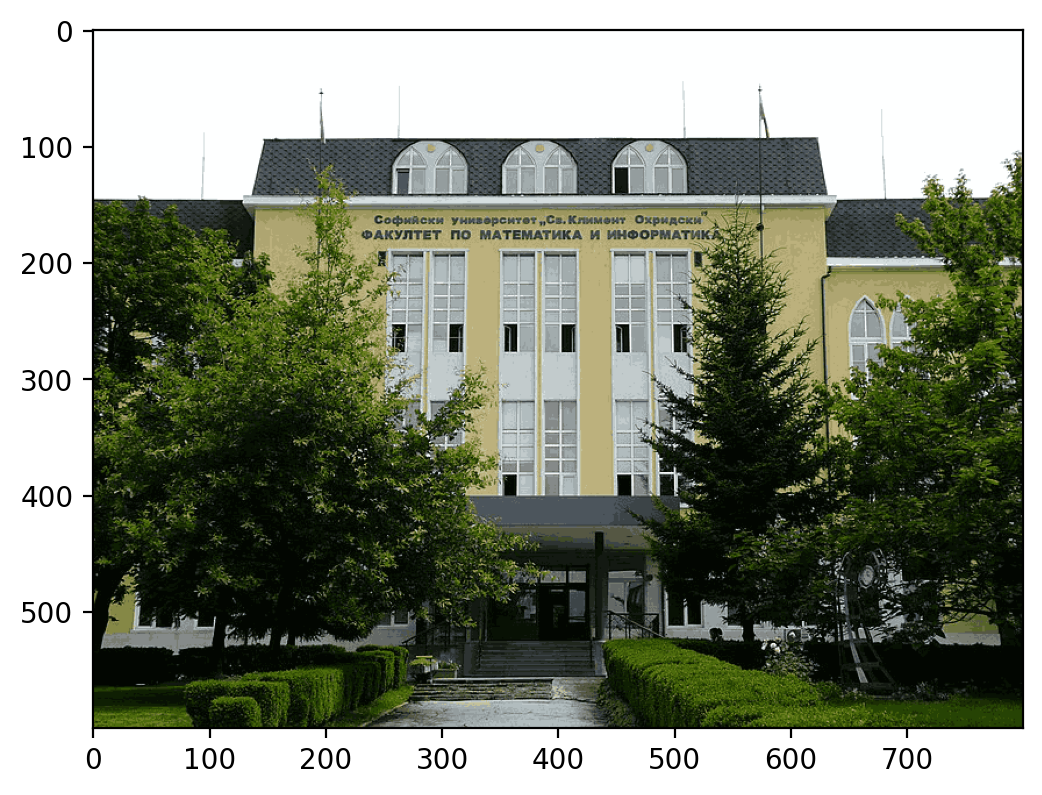

In [ ]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)

## Hierarchical Clustering

Two types of hierarchical clustering:

- Divisive (top down), and agglomerative (bottom up)

Hierarchical K-means is a divisive method

- Start with all the data in 1 cluster
- Split using “flat” K-means
- For each cluster, recursively split each cluster

K is usually small

Need to decide when to stop


## Divisive Methods 
## Hierarchical K-Means

| Training  | Final centroids |
| ------------- | ------------- |
| 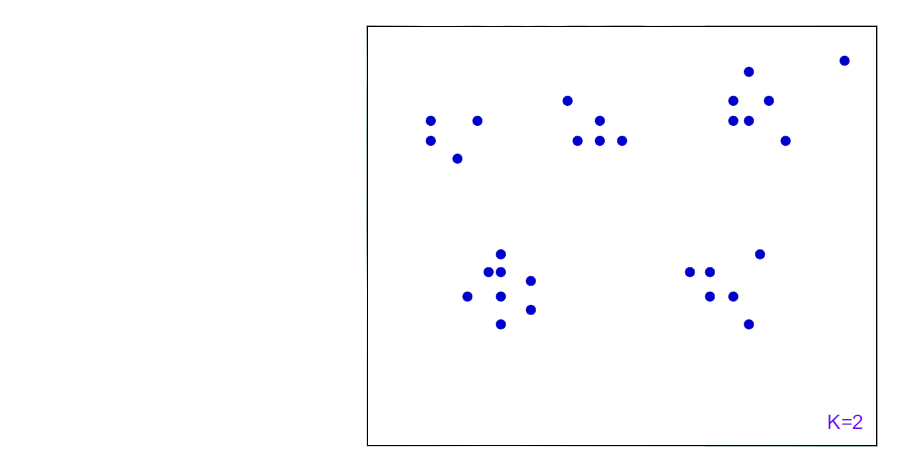   | 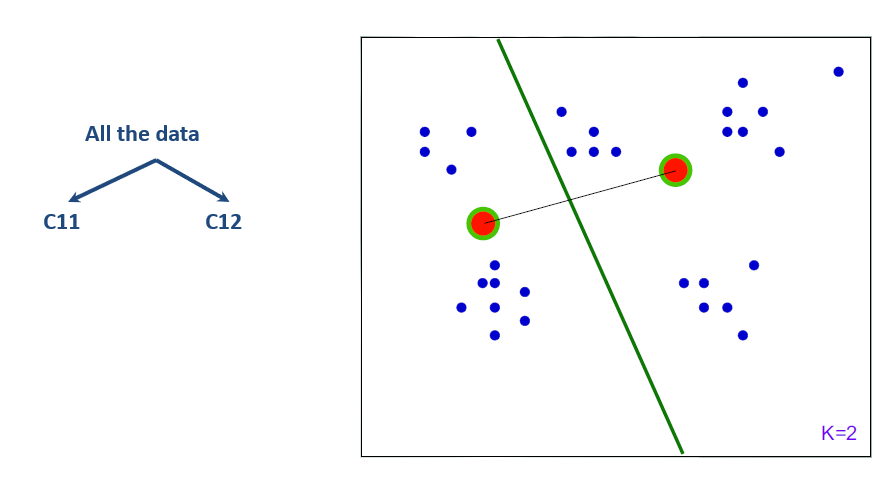  |
| 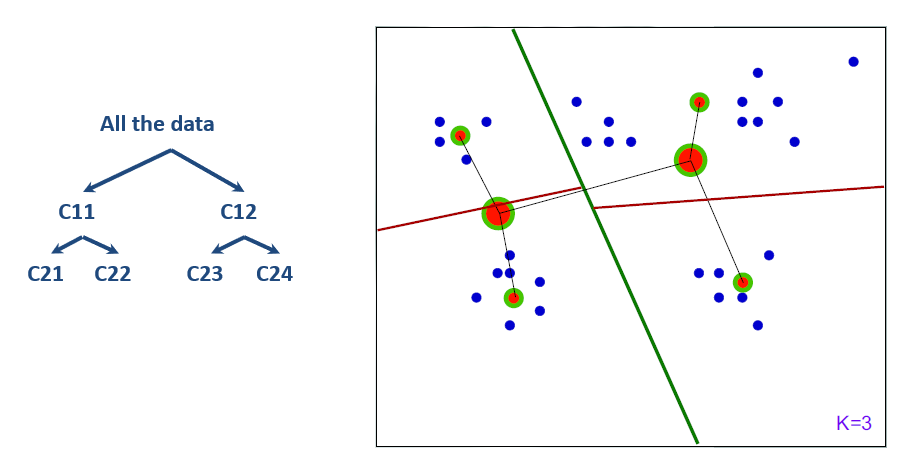   | 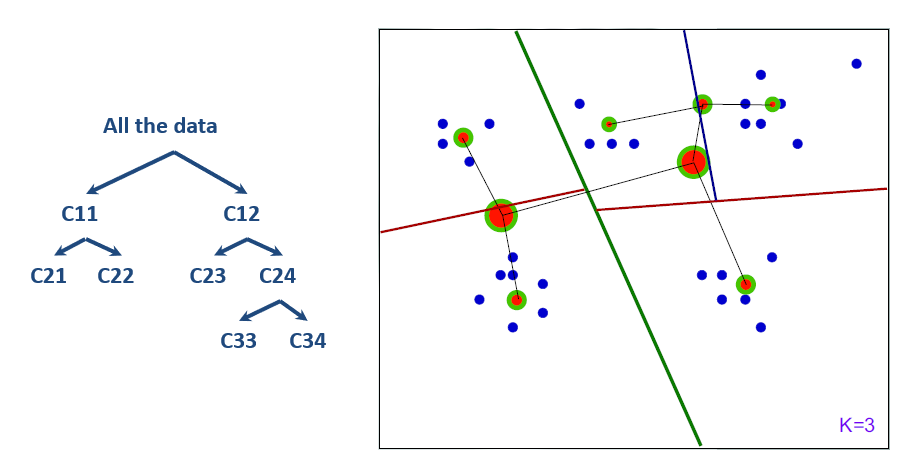  |


## Agglomerative Techniques
## Agglomerative Clustering

- Work in reverse direction (bottom up)

```psuedocode
Given N data points and dissimilarity measure:
    Start with all the data in separate classes
    Repeat N-1 times:
        Find closest two groups and merge them

```


| A dendrogram is a diagram that shows the hierarchical relationship between objects  | We can use it to decide how many clusters we need |
| ------------- | ------------- |
|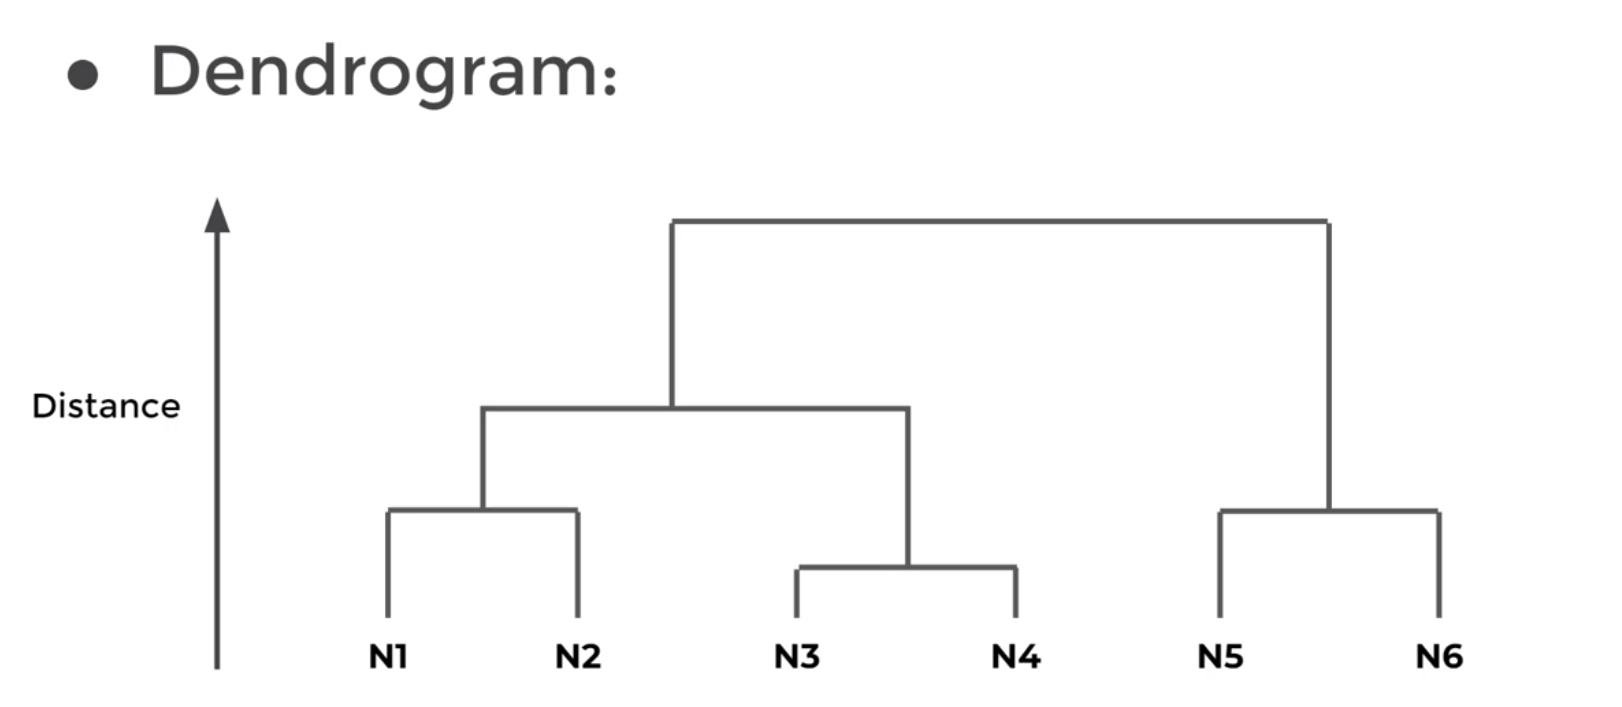  | 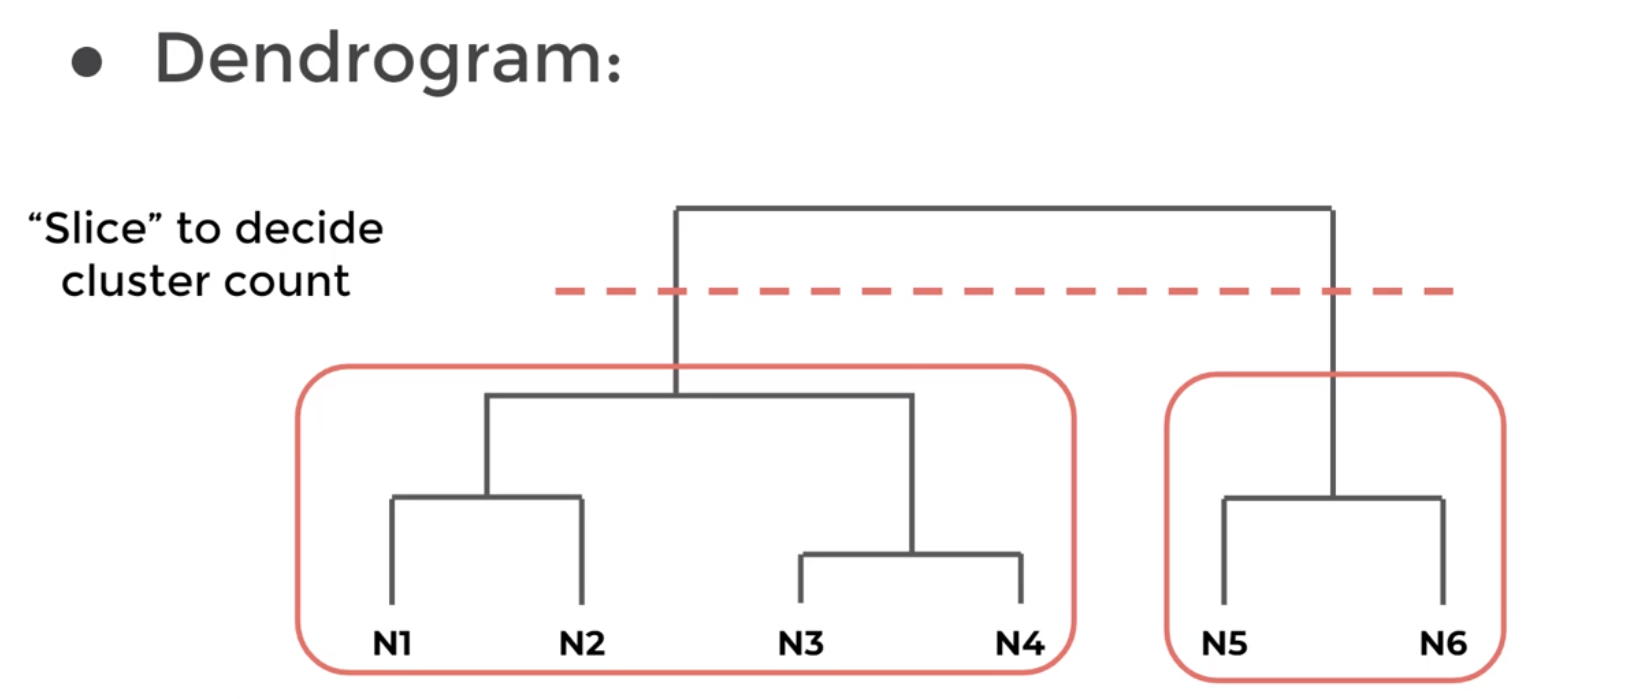  |

| How do we measure dissimilarity between groups?  | Final centroids |
| ------------- | ------------- |
| 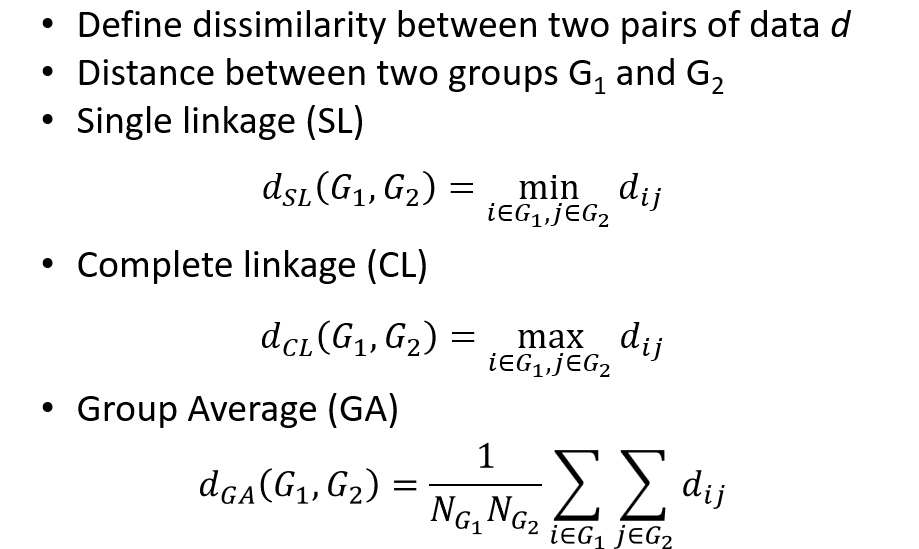   | 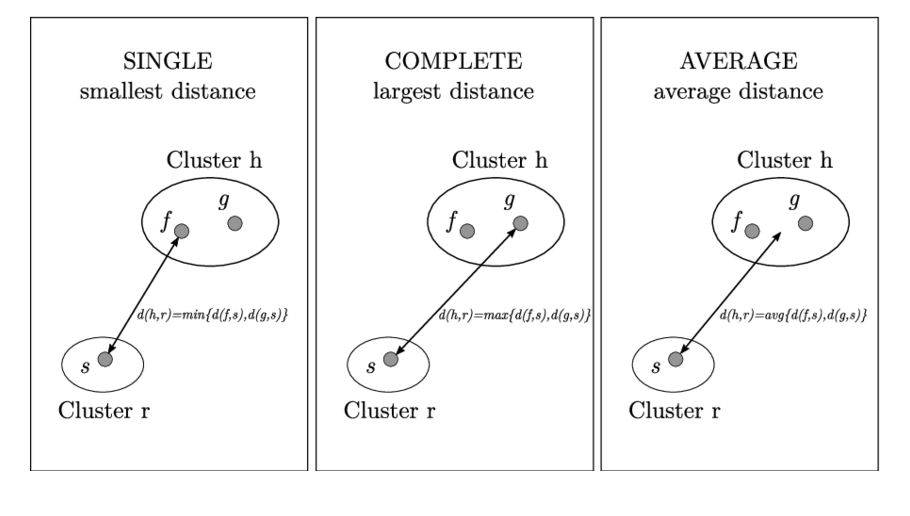  |

- If data is not nicely clustered, you will get different clusters
- If data is nicely clustered, particular choice doesn’t matter
- Single Link -> Less compact clusters
- Group Average -> Medium compact clusters 
- Complete Link -> More compact clusters


In [ ]:
from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
def plot_clusters(data, cluster_ids):
    plt.scatter(data[:,0], data[:,1], c = cluster_ids)
    plt.show()

In [ ]:
hierarchical_blobs, hierarchical_clusters = make_blobs()

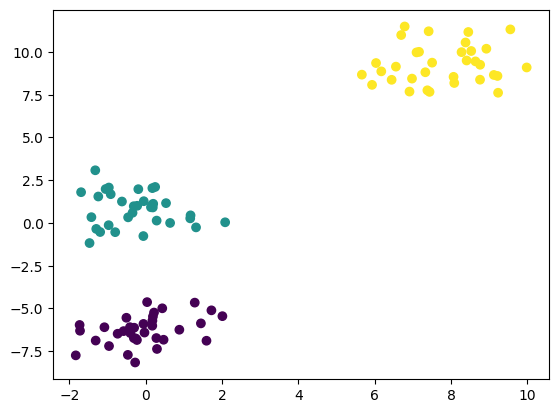

In [ ]:
plot_clusters(hierarchical_blobs, hierarchical_clusters)

In [ ]:
aggl = AgglomerativeClustering(n_clusters = 3)

In [ ]:
aggl.fit(hierarchical_blobs)

AgglomerativeClustering(n_clusters=3)

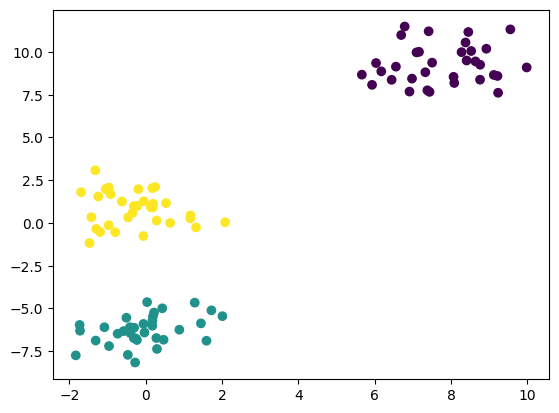

In [ ]:
plot_clusters(hierarchical_blobs, aggl.labels_)

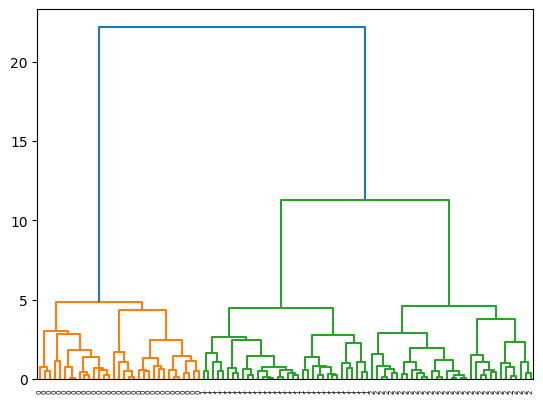

In [ ]:
row_clusters = linkage(hierarchical_blobs, method = "complete", metric = "euclidean")

dendrogram(row_clusters, labels = aggl.labels_)

plt.show()